## Importing Packages

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data preprocessing

In [2]:
# importing a dataset

from tensorflow.keras.datasets import mnist


In [3]:
# load the dataset

(x_train, y_train),(x_test, y_test) = mnist.load_data()

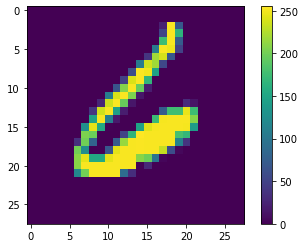

In [4]:
plt.imshow(x_train[59_986])
plt.colorbar();

In [5]:
# pixel valued from 0-255 and in our dataset the image is 2D with size of 28 * 28
print(f'Min: {x_train.min()} Max: {x_train.max()}')

print(f'\n Min: {y_test.min()} Max: {y_test.max()}')
# to understand the shape

print('\nShape of x_train dataset: ', x_train.shape)

Min: 0 Max: 255

 Min: 0 Max: 9

Shape of x_train dataset:  (60000, 28, 28)


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
# Normalize the dataset

x_train = x_train/255.0
y_test = x_test/255.0


In [8]:
x_train.min(), x_train.max()

# all the values are normalized under 0 to 1 for faster computation

(0.0, 1.0)

In [9]:
# reshaping the images (converting 2D data of 28*28 into 3D of size (28, 28, 1))

x_train = x_train.reshape(60_000, 28, 28, 1)
x_test = x_test.reshape(10_000, 28, 28, 1)


In [10]:
input_shape = x_train[0].shape
print(input_shape)

(28, 28, 1)


In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[15]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Building the Model


In [13]:
# defining a object

model = tf.keras.models.Sequential()

In [14]:
# Adding First Convolutional Layer

model.add(tf.keras.layers.Conv2D(filters = 32, 
                                 kernel_size = (3,3), 
                                 activation = 'relu',
                                 input_shape = [28, 28, 1]))


# Adding Second Convolutiional Layer

model.add(tf.keras.layers.Conv2D(filters = 64, 
                                 kernel_size = (3,3), 
                                 activation = 'relu'))


# Adding MaxPool Layer- pooling layer extracts the dominant feature and reduce the size of convolved feature 

model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))


# Adding Dropout layer
          
model.add(tf.keras.layers.Dropout(0.4))

# Adding Flattened layer

model.add(tf.keras.layers.Flatten())


# Adding Fully connected layer(dense layer)

model.add(tf.keras.layers.Dense(units =20,
                                activation = 'relu'))


# adding output layer

model.add(tf.keras.layers.Dense(units = 10,
                                activation = 'softmax'))


# Executing the summary of our model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                184340    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [15]:
# compiling a model

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

## Training the model


In [21]:
model.fit(x_train, y_train, epochs = 2)

Epoch 1/2


TypeError: 'NoneType' object is not callable

## Model Evaluation and prediction

In [22]:
y_pred = model.predict(x_test)
y_pred

array([[8.30918178e-02, 7.99642324e-01, 4.40258718e-09, ...,
        2.25040567e-04, 2.88960314e-15, 1.17040649e-01],
       [2.20128195e-03, 1.30921428e-03, 1.77362859e-02, ...,
        7.28009582e-01, 1.04383863e-11, 1.00680388e-07],
       [1.16459466e-06, 2.07426216e-04, 5.97122742e-12, ...,
        9.45014656e-01, 1.05812696e-17, 1.03520437e-12],
       ...,
       [4.93961494e-09, 1.76651627e-01, 9.70247703e-18, ...,
        8.23348343e-01, 1.13232902e-31, 8.18092989e-13],
       [1.26985488e-11, 8.00901717e-07, 1.79032733e-12, ...,
        2.36016628e-03, 2.58558252e-26, 9.97635245e-01],
       [3.24462939e-12, 2.29341981e-06, 3.61629726e-09, ...,
        9.99928951e-01, 4.95891546e-21, 1.84949024e-18]], dtype=float32)